In [16]:
data_path = "/content/drive/MyDrive/Interview/Silicon Orchard/DATA/CyberBulling_Dataset_Bangla.xlsx"

cleaned_data_path = '/content/drive/MyDrive/Interview/Silicon Orchard/DATA/cleaned_data.csv'

DIR_IMAGES_EDA = '/content/drive/MyDrive/Interview/Silicon Orchard/REPORT/'


In [ ]:
!pip install fasttext==0.9.2
!pip install transformers

### EDA AND DATA ENGINEERING

In [ ]:
import re
import string
import unicodedata

DIR_RESOURCES = '/content/drive/MyDrive/Interview/Silicon Orchard/'

class TextCleaner():
    def __init__(self,data_path):
        self.data = pd.read_excel(data_path)
        self.number_pattern = re.compile('[0-9]+')
        self.punct = string.punctuation
        self.punct = self.punct + '\n' + '’' + '‘' + ',' + '।'

    def remove_garbage(self, text):
        # remove non bangla text
        text = "".join(i for i in text if i in [".", "।"] or 2432 <= ord(i) <= 2559 or ord(i) == 32)
        # remove newline
        text = text.replace('\n', ' ')
        # remove unnecessary punctuation
        text = re.sub('[^\u0980-\u09FF]', ' ', str(text))
        # remove stopwords
        with open(DIR_RESOURCES + 'bangla_stopwords.txt', 'r', encoding='utf-8') as file:
            stp = file.read().split()
        result = text.split()
        text = [word.strip() for word in result if word not in stp]
        text = " ".join(text)
        return text

    def clean_text(self, text):

        if type(text) is not str:
            return None
        print(f'Before Cleaning: {text}')
        cleaned_text = self.remove_garbage(text)
        cleaned_text = re.sub(self.number_pattern, ' ', cleaned_text)
        cleaned_text = cleaned_text.strip(self.punct + '\n')
        cleaned_text = cleaned_text.translate(str.maketrans('', '', self.punct))
        cleaned_text = ' '.join(cleaned_text.split())
        cleaned_text = unicodedata.normalize('NFKC', cleaned_text)
        print(f'After cleaning: {cleaned_text}')
        return cleaned_text

    def main(self):
      self.data.rename(columns={"Description": 'text',
                             "Label": 'category'},
                    inplace=True)

      print(self.data.columns)

      cleaned_df = pd.DataFrame()

      cleaned_df['text'] = self.data['text'].apply(self.clean_text)
      cleaned_df['category'] = self.data['category']

      # self.data.dropna(subset=['category', 'text'],
      #               inplace=True)
      cleaned_df.dropna(inplace=True)

      print(f'\n\nData Shape Before cleaning:{self.data.shape[0]}')
      print(f'\n\nData Shape After cleaning: {cleaned_df.shape[0]}')
      cleaned_df.to_csv('/content/drive/MyDrive/Interview/Silicon Orchard/DATA/cleaned_data.csv')


In [ ]:
text_cleaner = TextCleaner(data_path)
text_cleaner.main()

In [ ]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


class DataVisualizer():

    def __init__(self, data_path):
        self.data = pd.read_csv(data_path)
        self.data['text'].astype(str)

    def show_class_distribution(self):
      sns.set(font_scale=1.4)
      self.data["category"].value_counts().plot(kind='barh', figsize=(8, 6))
      plt.xlabel("Number of Articles", labelpad=12)
      plt.ylabel("category", labelpad=12)
      plt.yticks(rotation = 45)
      plt.title("Dataset Distribution", y=1.02)
      plt.show()
      plt.close()

    def show_document_length_distribution(self):
        self.data['Length'] = self.data['text'].apply(lambda x: len(str(x).split()))
        matplotlib.rc_file_defaults()
        frequency = dict()
        for i in self.data.Length:
            frequency[i] = frequency.get(i, 0) + 1

        plt.figure(figsize=(4, 2))
        plt.bar(frequency.keys(), frequency.values(), color=(0.2, 0.4, 0.6, 0.6))
        # plt.xlim(12, 100)

        plt.xlabel('Length of the Documents')
        plt.ylabel('Frequency')
        plt.title('Length-Frequency Distribution')
        file_path = DIR_IMAGES_EDA + f'document_length_distribution.png'
        plt.savefig(file_path)
        plt.show()
        plt.close()
        print(f'document length distribution image saved to - {file_path}')


        print(f"Min : {self.data.Length.min()}\n")
        print(f"Max : {self.data.Length.max()}\n")
        print(f"Maximum Length of a Document: {max(self.data.Length)}\n")
        print(f"Minimum Length of a Document: {min(self.data.Length)}\n")
        print(f"Average Length of a Document: {round(np.mean(self.data.Length), 0)}\n")

        report_file_path = DIR_IMAGES_EDA + f'document_length.txt'
        with open(report_file_path, 'w') as file:
            file.write(f"Min : {self.data.Length.min()}\n")
            file.write(f"Max : {self.data.Length.max()}\n")
            file.write(f"Maximum Length of a Document: {max(self.data.Length)}\n")
            file.write(f"Minimum Length of a Document: {min(self.data.Length)}\n")
            file.write(f"Average Length of a Document: {round(np.mean(self.data.Length), 0)}\n")

    def show_data_summary(self):

        report_file_path = DIR_IMAGES_EDA + f'data_summary.txt'
        with open(report_file_path, 'w') as file:
            file.write('\n______________________showing data summary ________________________________\n')
            documents = []
            words = []
            u_words = []
            # find class names
            class_label = [k for k, v in self.data['category'].value_counts().to_dict().items()]
            print(class_label)
            for label in class_label:
                word_list = [word.strip().lower() for t in list(self.data[self.data['category'] == label]['text']) for word in
                             str(t).strip().split()]
                counts = dict()
                for word in word_list:
                    counts[word] = counts.get(word, 0) + 1
                # sort the dictionary of word list
                ordered = sorted(counts.items(), key=lambda item: item[1], reverse=True)
                # Documents per class
                documents.append(len(list(self.data[self.data['category'] == label]['text'])))
                # Total Word per class
                words.append(len(word_list))
                # Unique words per class
                u_words.append(len(np.unique(word_list)))

                file.write(f"\nClass Name : {label}")
                file.write(f"\nNumber of Documents: {len(list(self.data[self.data['category'] == label]['text']))}")
                file.write(f"\nNumber of Words:{len(word_list)}")
                file.write(f"\nNumber of Unique Words:{len(np.unique(word_list))}")
                file.write(f"\nMost Frequent Words:\n")
                for k, v in ordered[:10]:
                    file.write(f"\n{k}\t{v}")

            data_matrix = pd.DataFrame({'Total Documents': documents,
                                        'Total Words': words,
                                        'Unique Words': u_words,
                                        'Class Names': class_label})
            file.write('\n______________________summary________________________________\n')
            file.write(f'{data_matrix}\n')

        df = pd.melt(data_matrix, id_vars="Class Names", var_name="Category", value_name="Values")
        # plt.figure(figsize=(8, 6))
        ax = plt.subplot()

        sns.barplot(data=df, x='Class Names', y='Values', hue='Category')
        ax.set_xlabel('Class Names')
        ax.set_title('Data Statistics')
        class_names = class_label
        ax.xaxis.set_ticklabels(class_names, rotation=45)
        file_path = DIR_IMAGES_EDA + f'data_summary.png'
        plt.savefig(file_path)
        plt.show()
        plt.close()

    def main(self):
      self.show_class_distribution()
      self.show_document_length_distribution()
      self.show_data_summary()



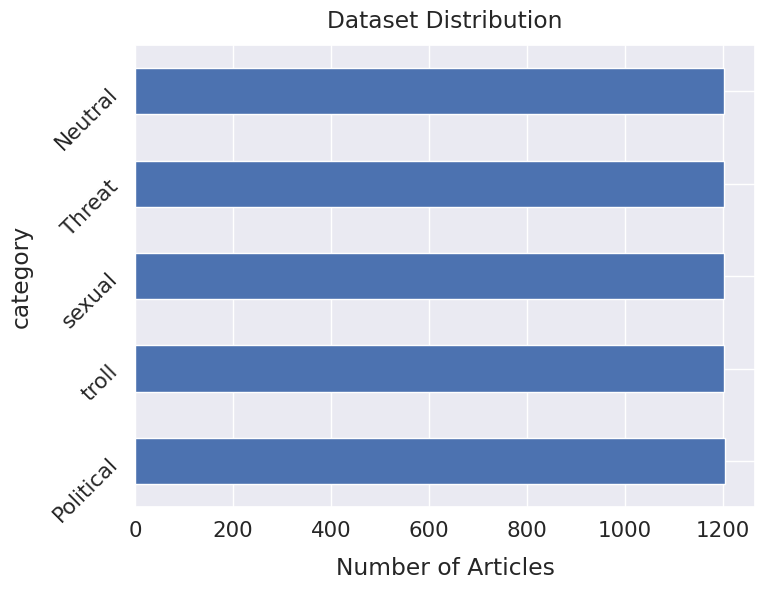

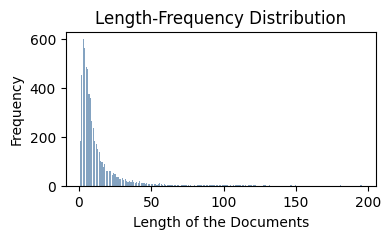

document length distribution image saved to - /content/drive/MyDrive/Interview/Silicon Orchard/REPORT/document_length_distribution.png
Min : 1

Max : 195

Maximum Length of a Document: 195

Minimum Length of a Document: 1

Average Length of a Document: 12.0

['Political', 'troll', 'sexual', 'Threat', 'Neutral']


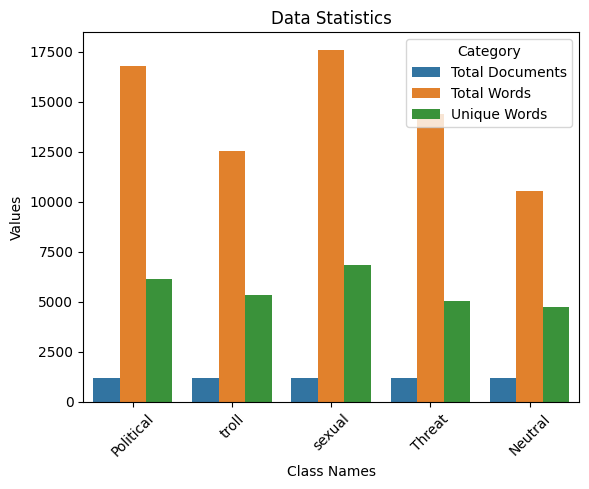

In [ ]:
visualizer = DataVisualizer(cleaned_data_path)
visualizer.main()

In [ ]:
from tqdm import tqdm
from pprint import pprint

# from settings import DIR_IMAGES_EDA


class DataAnalyzer():

    def __init__(self,data_path):
        self.data = pd.read_csv(data_path)

    def check_chars(self):
        lines = self.data['text'].to_list()
        list_of_str = [text for text in lines]

        char_dict = {}
        for i in tqdm(list_of_str):
            for c in str(i):
                if c not in char_dict:
                    char_dict[c] = True
        report_file_path = DIR_IMAGES_EDA + f'cleaned_data.txt'

        print(f'\nCharacters Sorted : {sorted(char_dict)}')
        print(f'\nTotal characters : {len(char_dict)}')

        with open(report_file_path, 'w') as file:
            file.write(f'\nCharacters Sorted : {sorted(char_dict)}')
            file.write(f'\nTotal characters : {len(char_dict)}')

        return char_dict

    def show_cleaned_data(self):
        sample_data = self.data.sample(10)
        sample_data = sample_data.reset_index()
        report_file_path = DIR_IMAGES_EDA + f'cleaned_data.txt'
        with open(report_file_path, 'w') as file:
            file.write('\n______________________showing cleaned data________________________________\n')
            for row in range(len(sample_data)):
                # file.write(f'\nOriginal: {sample_data.loc[row]["text"]}\n'
                #            f'\nCleaned: {sample_data.loc[row]["text"]}\n'
                #            f'\nCategory: {sample_data.loc[row]["category"]}\n')

                print(f'\nCleaned: {sample_data.loc[row]["text"]}\n'
                           f'\nCategory: {sample_data.loc[row]["category"]}\n')

    def main(self):
      self.show_cleaned_data()
      self.check_chars()




In [ ]:
# data visuliazation
analyzer = DataAnalyzer(cleaned_data_path)
analyzer.main()


In [11]:
import os
from pathlib import Path
import json

def add_into_existing_json(data, filename):
    file_path = '/'.join(filename.split('/')[:-1])
    listObj = []

    # Check if file exists
    # isExist = os.path.exists(file_path)
    # if not isExist:
    os.makedirs(file_path, exist_ok=True)

    # Read JSON file
    try:
        with open(filename) as fp:
            listObj = json.load(fp)
    except Exception as e:
        print(e)

    listObj.append(data)
    # listObj = set(listObj)
    with open(filename, 'w') as json_file:
        json.dump(listObj, json_file,
                  indent=4,
                  separators=(',', ': '), ensure_ascii=False)

    print(f'Successfully appended to the {filename}')

### Multiclass Classification

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,f1_score
import itertools
from fasttext import load_model
import pandas as pd
import numpy as np
import json

In [ ]:
# import fasttext.util
# fasttext.util.download_model('bn', if_exists='ignore')  #bengali

In [53]:
class MulticlassClassifier:

    def __init__(self, cleaned_data_path):
        self.accuracy_dict = {}
        self.data = pd.read_csv(cleaned_data_path)
        self.data.dropna(inplace=True, axis=0)

    def calc_tfidf(self, data, col_name):

        tfidf = TfidfVectorizer(use_idf=True, tokenizer=lambda x: x.split())
        X = tfidf.fit_transform(data[col_name])
        coo_matrix = X.tocoo()
        tuples = zip(coo_matrix.col, coo_matrix.data)
        feature_names = tfidf.get_feature_names_out()

        sorted_items = sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)

        return tfidf, X

    def label_encoding(self, data, sentiment):

        le = LabelEncoder()
        le.fit(data[sentiment])
        encoded_labels = le.transform(data[sentiment])
        labels = np.array(encoded_labels)  # Converting into numpy array
        class_names = le.classes_  ## Define the class names again

        return labels

    def dataset_split(self, X, Y):

        X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.9,
                                                            test_size=0.1, random_state=0)

        return X_train, X_test, y_train, y_test

    def model_fiting(self, model, X_train, X_test, y_train, y_test):

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        ac = f1_score(y_test, y_pred, average='macro')
        print(f"Accuracy score validation data : {ac}")
        cm = confusion_matrix(y_test, y_pred)
        print(cm)
        cls_report = classification_report(y_test, y_pred)
        print(cls_report)
        return ac

    def encode_data(self, MAX_NB_WORDS):
        tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n-',
                              split=' ', char_level=False, oov_token='<oov>', document_count=0)
        # Fit the tokenizer
        tokenizer.fit_on_texts(self.data.text)
        sequences = tokenizer.texts_to_sequences(self.data.text)
        corpus = keras.preprocessing.sequence.pad_sequences(sequences, value=0.0,
                                                            padding='post', maxlen=256)

        # save the tokenizer into a pickle file
        # with open(DIR_RESOURCES + 'tokenizer.pickle', 'wb') as handle:
        #     pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
        labels = self.label_encoding(self.data, 'category')

        return corpus, labels

    def plot_accuracy_and_loss(self, history):

        # Plot training & validation accuracy values
        plt.plot(history.history['accuracy'])
        # plt.plot(history.history['val_accuracy'])
        plt.title('Model accuracy')
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Test'], loc='upper left')
        # plt.savefig(f'{DIR_IMAGES_HISTORY}/{name}_accuracy.png')
        plt.show()
        plt.close()
        # Plot training & validation loss values
        if history.history['loss']:
            plt.plot(history.history['loss'])
            # plt.plot(history.history['val_loss'])
            plt.title('Model loss')
            plt.ylabel('Loss')
            plt.xlabel('Epoch')
            plt.legend(['Train', 'Test'], loc='upper left')
            # plt.savefig(f'{DIR_IMAGES_HISTORY}/{name}_loss.png')
            plt.show()
            plt.close()
        else:
            pass

    def plot_confusion_matrix(self, cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

        fmt = '.2f' if normalize else 'd'
        thresh = cm.max() / 2.

        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.show()

    def train_lstm_model(self):
        texts = self.data['text'].tolist()
        labels = self.data['category'].tolist()

        # Convert labels to numerical values
        label_set = sorted(set(labels))
        label_mapping = {label: index for index, label in enumerate(label_set)}
        classes = label_mapping.keys()
        labels = [label_mapping[label] for label in labels]
        num_classes = len(label_set)

        # Split the data into training and testing sets
        train_texts, test_texts, train_labels, test_labels = train_test_split(texts, labels, test_size=0.2,
                                                                              random_state=42)

        tokenizer = Tokenizer()
        tokenizer.fit_on_texts(train_texts)
        train_sequences = tokenizer.texts_to_sequences(train_texts)
        test_sequences = tokenizer.texts_to_sequences(test_texts)
        max_sequence_length = max(max(len(seq) for seq in train_sequences), max(len(seq) for seq in test_sequences))
        vocab_size = len(tokenizer.word_index) + 1
        train_data = pad_sequences(train_sequences, maxlen=max_sequence_length)
        test_data = pad_sequences(test_sequences, maxlen=max_sequence_length)

        # Load FastText embeddings
        embedding_model = load_model("/content/drive/MyDrive/Interview/Silicon Orchard/cc.bn.300.bin")
        embedding_dim = embedding_model.get_dimension()

        # Prepare embedding matrix
        embedding_matrix = np.zeros((vocab_size, embedding_dim))
        for word, i in tokenizer.word_index.items():
            if word in embedding_model:
                embedding_matrix[i] = embedding_model[word]

        # Define and compile the LSTM model
        model = Sequential()
        model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, weights=[embedding_matrix],
                            input_length=max_sequence_length, trainable=False))
        model.add(LSTM(units=128))
        model.add(Dense(units=num_classes, activation='softmax'))

        model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

        # Train the model
        history = model.fit(train_data, np.array(train_labels), epochs=15, batch_size=32)

        self.plot_accuracy_and_loss(history)


        y_pred = model.predict(test_data)

        predicted_labels = np.argmax(y_pred, axis=1)
        # predicted_classes = [label_mapping[label] for label in predicted_labels]
        # print(f"Accuracy score validation data : {accuracy_score(y_test, y_pred)}")
        lstm_acc = f1_score(test_labels, predicted_labels, average='macro')

        add_into_existing_json({'lstm_word_embedding': lstm_acc}, f'{DIR_IMAGES_EDA}mul_accuracy_score.json')

        cm = confusion_matrix(test_labels, predicted_labels)
        self.plot_confusion_matrix(cm, classes)
        print(cm)
        cls_report = classification_report(test_labels, predicted_labels)
        print(cls_report)

    def train_ml_models(self, data):
        tfidf, feature = self.calc_tfidf(data, 'text')
        labels = self.label_encoding(data, 'category')
        X_train, X_test, y_train, y_test = self.dataset_split(feature, labels)

        print(f"\nRandom Forest Classifier\n")
        rf_model = RandomForestClassifier(bootstrap=False, criterion="gini", max_features=0.05, min_samples_leaf=19,
                                          min_samples_split=3, n_estimators=100)
        rf_acc = self.model_fiting(rf_model, X_train, X_test, y_train, y_test)

        add_into_existing_json({'random_forest': rf_acc}, f'{DIR_IMAGES_EDA}mul_accuracy_score.json')

        # self.accuracy_dict['randomForest'] = rf_acc

        print('\nLogistic Regression\n')
        lr_model = LogisticRegression(random_state=123, max_iter=300)
        lr_acc = self.model_fiting(lr_model, X_train, X_test, y_train, y_test)

        add_into_existing_json({'logistic_regression': lr_acc}, f'{DIR_IMAGES_EDA}mul_accuracy_score.json')

        print('\nDecision Tree\n')
        dt_model = DecisionTreeClassifier(criterion='entropy', random_state=0)
        dt_acc = self.model_fiting(dt_model, X_train, X_test, y_train, y_test)

        add_into_existing_json({'Decision_tree': dt_acc}, f'{DIR_IMAGES_EDA}mul_accuracy_score.json')

        print('\n Naive Baise\n')

        mnb_model = MultinomialNB(alpha=0.15)
        nmb_acc = self.model_fiting(mnb_model, X_train, X_test, y_train, y_test)

        add_into_existing_json({'Navie_baise': nmb_acc}, f'{DIR_IMAGES_EDA}mul_accuracy_score.json')


## Train the models

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(



Random Forest Classifier

Accuracy score validation data : 0.6159950676452862
[[92  0  4  4 13]
 [27 73  2  4 11]
 [18  4 95 13  2]
 [40  2  4 51 16]
 [45  5  5 14 57]]
              precision    recall  f1-score   support

           0       0.41      0.81      0.55       113
           1       0.87      0.62      0.73       117
           2       0.86      0.72      0.79       132
           3       0.59      0.45      0.51       113
           4       0.58      0.45      0.51       126

    accuracy                           0.61       601
   macro avg       0.66      0.61      0.62       601
weighted avg       0.67      0.61      0.62       601

[Errno 2] No such file or directory: '/content/drive/MyDrive/Interview/Silicon Orchard/REPORT/mul_accuracy_score.json'
Successfully appended to the /content/drive/MyDrive/Interview/Silicon Orchard/REPORT/mul_accuracy_score.json

Logistic Regression

Accuracy score validation data : 0.7281252736516247
[[ 78   6   2   9  18]
 [  9  97   0   

Epoch 1/15
151/151 [==============================] - 4s 10ms/step - loss: 1.4044 - accuracy: 0.4661
Epoch 2/15
151/151 [==============================] - 1s 9ms/step - loss: 1.1022 - accuracy: 0.6082
Epoch 3/15
151/151 [==============================] - 1s 9ms/step - loss: 0.9668 - accuracy: 0.6449
Epoch 4/15
151/151 [==============================] - 1s 9ms/step - loss: 0.8718 - accuracy: 0.6867
Epoch 5/15
151/151 [==============================] - 1s 9ms/step - loss: 0.8207 - accuracy: 0.6973
Epoch 6/15
151/151 [==============================] - 2s 10ms/step - loss: 0.7721 - accuracy: 0.7154
Epoch 7/15
151/151 [==============================] - 2s 11ms/step - loss: 0.7358 - accuracy: 0.7352
Epoch 8/15
151/151 [==============================] - 2s 11ms/step - loss: 0.6914 - accuracy: 0.7533
Epoch 9/15
151/151 [==============================] - 2s 10ms/step - loss: 0.7401 - accuracy: 0.7350
Epoch 10/15
151/151 [==============================] - 1s 9ms/step - loss: 0.6510 - accuracy: 0

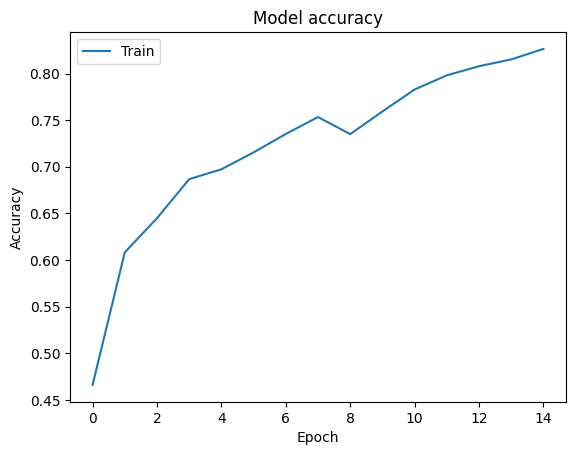

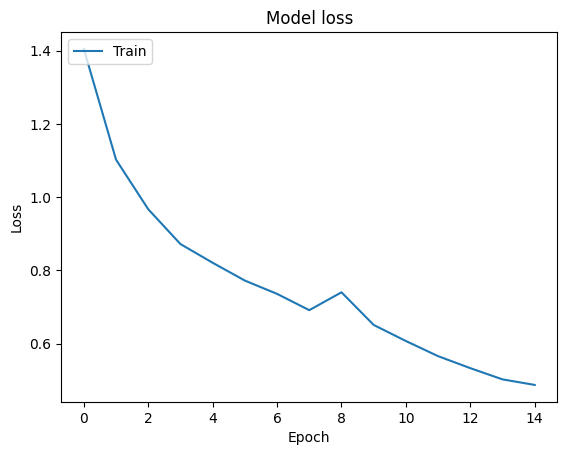

38/38 [==============================] - 1s 6ms/step
Successfully appended to the /content/drive/MyDrive/Interview/Silicon Orchard/REPORT/mul_accuracy_score.json


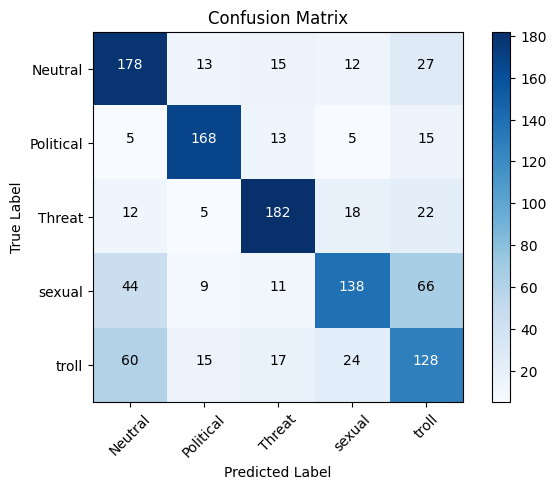

[[178  13  15  12  27]
 [  5 168  13   5  15]
 [ 12   5 182  18  22]
 [ 44   9  11 138  66]
 [ 60  15  17  24 128]]
              precision    recall  f1-score   support

           0       0.60      0.73      0.65       245
           1       0.80      0.82      0.81       206
           2       0.76      0.76      0.76       239
           3       0.70      0.51      0.59       268
           4       0.50      0.52      0.51       244

    accuracy                           0.66      1202
   macro avg       0.67      0.67      0.67      1202
weighted avg       0.67      0.66      0.66      1202



In [54]:


ml_classifier = MulticlassClassifier(cleaned_data_path)
ml_classifier.train_ml_models(ml_classifier.data)
ml_classifier.train_lstm_model()


## Transformed Based Model Training

In [55]:
import pandas as pd
import torch
import numpy as np
from transformers import BertTokenizer, BertModel
from torch import nn
from torch.optim import Adam
from tqdm import tqdm

datapath = f'/content/drive/MyDrive/Interview/Silicon Orchard/DATA/cleaned_data.csv'
df = pd.read_csv(datapath)
df.dropna(inplace=True)
df.head()

tokenizer = BertTokenizer.from_pretrained('bert-base-cased')
labels = {'Neutral':0,
          'Political':1,
          'Threat':2,
          'sexual':3,
          'troll':4
          }

class Dataset(torch.utils.data.Dataset):

    def __init__(self, df):

        self.labels = [labels[label] for label in df['category']]
        self.texts = [tokenizer(text,
                               padding='max_length', max_length = 512, truncation=True,
                                return_tensors="pt") for text in df['text']]

    def classes(self):
        return self.labels

    def __len__(self):
        return len(self.labels)

    def get_batch_labels(self, idx):
        # Fetch a batch of labels
        return np.array(self.labels[idx])

    def get_batch_texts(self, idx):
        # Fetch a batch of inputs
        return self.texts[idx]

    def __getitem__(self, idx):

        batch_texts = self.get_batch_texts(idx)
        batch_y = self.get_batch_labels(idx)

        return batch_texts, batch_y

class BertClassifier(nn.Module):

    def __init__(self, dropout=0.5):

        super(BertClassifier, self).__init__()

        self.bert = BertModel.from_pretrained('bert-base-cased')
        self.dropout = nn.Dropout(dropout)
        self.linear = nn.Linear(768, 5)
        self.relu = nn.ReLU()

    def forward(self, input_id, mask):

        _, pooled_output = self.bert(input_ids= input_id, attention_mask=mask,return_dict=False)
        dropout_output = self.dropout(pooled_output)
        linear_output = self.linear(dropout_output)
        final_layer = self.relu(linear_output)

        return final_layer


def train(model, train_data, val_data, learning_rate, epochs):

    train, val = Dataset(train_data), Dataset(val_data)

    train_dataloader = torch.utils.data.DataLoader(train, batch_size=2, shuffle=True)
    val_dataloader = torch.utils.data.DataLoader(val, batch_size=2)

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    criterion = nn.CrossEntropyLoss()
    optimizer = Adam(model.parameters(), lr= learning_rate)

    if use_cuda:

            model = model.cuda()
            criterion = criterion.cuda()

    for epoch_num in range(epochs):

            total_acc_train = 0
            total_loss_train = 0

            for train_input, train_label in tqdm(train_dataloader):

                train_label = train_label.to(device)
                mask = train_input['attention_mask'].to(device)
                input_id = train_input['input_ids'].squeeze(1).to(device)

                output = model(input_id, mask)

                batch_loss = criterion(output, train_label.long())
                total_loss_train += batch_loss.item()

                acc = (output.argmax(dim=1) == train_label).sum().item()
                total_acc_train += acc

                model.zero_grad()
                batch_loss.backward()
                optimizer.step()

            total_acc_val = 0
            total_loss_val = 0

            with torch.no_grad():

                for val_input, val_label in val_dataloader:

                    val_label = val_label.to(device)
                    mask = val_input['attention_mask'].to(device)
                    input_id = val_input['input_ids'].squeeze(1).to(device)

                    output = model(input_id, mask)

                    batch_loss = criterion(output, val_label.long())
                    total_loss_val += batch_loss.item()

                    acc = (output.argmax(dim=1) == val_label).sum().item()
                    total_acc_val += acc

            print(
                f'Epochs: {epoch_num + 1} | Train Loss: {total_loss_train / len(train_data): .3f} | Train Accuracy: {total_acc_train / len(train_data): .3f} | Val Loss: {total_loss_val / len(val_data): .3f} | Val Accuracy: {total_acc_val / len(val_data): .3f}')


def evaluate(model, test_data):

    test = Dataset(test_data)

    test_dataloader = torch.utils.data.DataLoader(test, batch_size=2)

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    if use_cuda:

        model = model.cuda()

    total_acc_test = 0
    with torch.no_grad():

        for test_input, test_label in test_dataloader:

              test_label = test_label.to(device)
              mask = test_input['attention_mask'].to(device)
              input_id = test_input['input_ids'].squeeze(1).to(device)

              output = model(input_id, mask)

              acc = (output.argmax(dim=1) == test_label).sum().item()
              total_acc_test += acc
    bert_json = {'transformerbasedEmbedding': total_acc_test / len(test_data)}
    add_into_existing_json(bert_json,f'{DIR_IMAGES_EDA}mul_accuracy_score.json')
    print(f'Test Accuracy: {total_acc_test / len(test_data): .3f}')

np.random.seed(112)
df_train, df_val, df_test = np.split(df.sample(frac=1, random_state=42),
                                     [int(.8*len(df)), int(.9*len(df))])

print(len(df_train),len(df_val), len(df_test))


EPOCHS = 5
model = BertClassifier()
LR = 1e-6

train(model, df_train, df_val, LR, EPOCHS)



4804 601 601


Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
100%|██████████| 2402/2402 [08:36<00:00,  4.65it/s]


Epochs: 1 | Train Loss:  0.808 | Train Accuracy:  0.211 | Val Loss:  0.802 | Val Accuracy:  0.256


100%|██████████| 2402/2402 [08:35<00:00,  4.66it/s]


Epochs: 2 | Train Loss:  0.779 | Train Accuracy:  0.277 | Val Loss:  0.718 | Val Accuracy:  0.358


100%|██████████| 2402/2402 [08:37<00:00,  4.64it/s]


Epochs: 3 | Train Loss:  0.673 | Train Accuracy:  0.442 | Val Loss:  0.620 | Val Accuracy:  0.514


100%|██████████| 2402/2402 [08:42<00:00,  4.60it/s]


Epochs: 4 | Train Loss:  0.589 | Train Accuracy:  0.550 | Val Loss:  0.579 | Val Accuracy:  0.549


100%|██████████| 2402/2402 [08:38<00:00,  4.64it/s]


Epochs: 5 | Train Loss:  0.519 | Train Accuracy:  0.617 | Val Loss:  0.573 | Val Accuracy:  0.562


In [57]:
evaluate(model, df_test)

Successfully appended to the /content/drive/MyDrive/Interview/Silicon Orchard/REPORT/mul_accuracy_score.json
Test Accuracy:  0.544


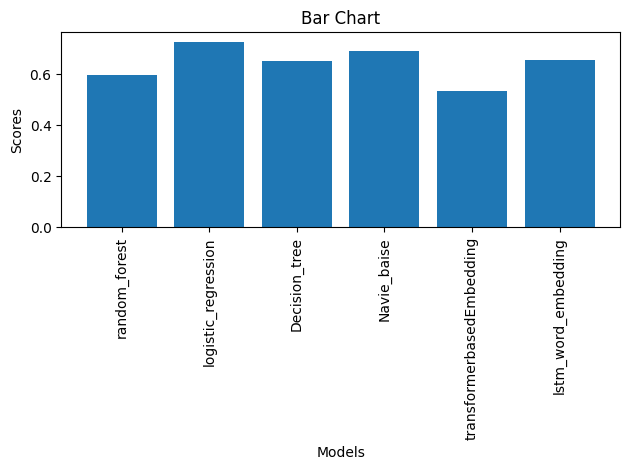

In [58]:
import json
import matplotlib.pyplot as plt

def show_comparision_table(file_name):
    with open(file_name, 'r') as json_file:
        data = json.load(json_file)

    # Step 2: Extract the necessary information from the data
    models = []
    scores = []

    for item in data:
        model = list(item.keys())[0]
        score = item[model]
        models.append(model)
        scores.append(score)

    # Step 3: Create the bar chart
    plt.bar(models, scores)
    plt.xlabel('Models')
    plt.ylabel('Scores')
    plt.title('Bar Chart')

    # Step 4: Display the chart
    plt.xticks(rotation=90)  # Rotate the x-axis labels for better visibility
    plt.tight_layout()  # Adjust the layout to prevent label cutoff
    plt.show()

file_name = '/content/drive/MyDrive/Interview/Silicon Orchard/REPORT/accuracy_score.json'
show_comparision_table(file_name)


## Binary Classifier

In [ ]:
## Prepare dataset for binary classification

In [31]:
def make_multiclass_data_to_binary_class(data_path):
    df = pd.read_csv(data_path)
    df['new_label'] = df['category'].map(lambda x: 'not bully' if x == 'Neutral' else 'bully')
    df[['text','new_label']].to_csv('/content/drive/MyDrive/Interview/Silicon Orchard/DATA/binary_data.csv')

make_multiclass_data_to_binary_class(cleaned_data_path)

In [59]:
class BinaryclassClassifier:

    def __init__(self, cleaned_data_path):
        self.data = pd.read_csv(cleaned_data_path)
        self.data.rename(columns={'new_label':'category'},inplace=True)
        self.data.dropna(inplace=True, axis=0)

    def calc_tfidf(self, data, col_name):

        tfidf = TfidfVectorizer(use_idf=True, tokenizer=lambda x: x.split())
        X = tfidf.fit_transform(data[col_name])
        coo_matrix = X.tocoo()
        tuples = zip(coo_matrix.col, coo_matrix.data)
        feature_names = tfidf.get_feature_names_out()

        sorted_items = sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)

        return tfidf, X

    def label_encoding(self, data, sentiment):

        le = LabelEncoder()
        le.fit(data[sentiment])
        encoded_labels = le.transform(data[sentiment])
        labels = np.array(encoded_labels)  # Converting into numpy array
        class_names = le.classes_  ## Define the class names again

        return labels

    def dataset_split(self, X, Y):

        X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.9,
                                                            test_size=0.1, random_state=0)

        return X_train, X_test, y_train, y_test

    def model_fiting(self, model, X_train, X_test, y_train, y_test):

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        ac = f1_score(y_test, y_pred, average='macro')
        print(f"Accuracy score validation data : {ac}")
        cm = confusion_matrix(y_test, y_pred)
        print(cm)
        cls_report = classification_report(y_test, y_pred)
        print(cls_report)
        return ac

    def encode_data(self, MAX_NB_WORDS):
        tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n-',
                              split=' ', char_level=False, oov_token='<oov>', document_count=0)
        # Fit the tokenizer
        tokenizer.fit_on_texts(self.data.text)
        sequences = tokenizer.texts_to_sequences(self.data.text)
        corpus = keras.preprocessing.sequence.pad_sequences(sequences, value=0.0,
                                                            padding='post', maxlen=256)

        # save the tokenizer into a pickle file
        # with open(DIR_RESOURCES + 'tokenizer.pickle', 'wb') as handle:
        #     pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
        labels = self.label_encoding(self.data, 'category')

        return corpus, labels

    def plot_accuracy_and_loss(self, history):

        # Plot training & validation accuracy values
        plt.plot(history.history['accuracy'])
        # plt.plot(history.history['val_accuracy'])
        plt.title('Model accuracy')
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Test'], loc='upper left')
        # plt.savefig(f'{DIR_IMAGES_HISTORY}/{name}_accuracy.png')
        plt.show()
        plt.close()
        # Plot training & validation loss values
        if history.history['loss']:
            plt.plot(history.history['loss'])
            # plt.plot(history.history['val_loss'])
            plt.title('Model loss')
            plt.ylabel('Loss')
            plt.xlabel('Epoch')
            plt.legend(['Train', 'Test'], loc='upper left')
            # plt.savefig(f'{DIR_IMAGES_HISTORY}/{name}_loss.png')
            plt.show()
            plt.close()
        else:
            pass

    def plot_confusion_matrix(self, cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

        fmt = '.2f' if normalize else 'd'
        thresh = cm.max() / 2.

        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.show()

    def train_lstm_model(self):
        texts = self.data['text'].tolist()
        labels = self.data['category'].tolist()

        # Convert labels to numerical values
        label_set = sorted(set(labels))
        label_mapping = {label: index for index, label in enumerate(label_set)}
        classes = label_mapping.keys()
        labels = [label_mapping[label] for label in labels]
        num_classes = len(label_set)

        # Split the data into training and testing sets
        train_texts, test_texts, train_labels, test_labels = train_test_split(texts, labels, test_size=0.2,
                                                                              random_state=42)

        tokenizer = Tokenizer()
        tokenizer.fit_on_texts(train_texts)
        train_sequences = tokenizer.texts_to_sequences(train_texts)
        test_sequences = tokenizer.texts_to_sequences(test_texts)
        max_sequence_length = max(max(len(seq) for seq in train_sequences), max(len(seq) for seq in test_sequences))
        vocab_size = len(tokenizer.word_index) + 1
        train_data = pad_sequences(train_sequences, maxlen=max_sequence_length)
        test_data = pad_sequences(test_sequences, maxlen=max_sequence_length)

        # Load FastText embeddings
        embedding_model = load_model("/content/drive/MyDrive/Interview/Silicon Orchard/cc.bn.300.bin")
        embedding_dim = embedding_model.get_dimension()

        # Prepare embedding matrix
        embedding_matrix = np.zeros((vocab_size, embedding_dim))
        for word, i in tokenizer.word_index.items():
            if word in embedding_model:
                embedding_matrix[i] = embedding_model[word]

        # Define and compile the LSTM model
        model = Sequential()
        model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, weights=[embedding_matrix],
                            input_length=max_sequence_length, trainable=False))
        model.add(LSTM(units=128))
        model.add(Dense(units=num_classes, activation='softmax'))

        model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

        # Train the model
        history = model.fit(train_data, np.array(train_labels), epochs=15, batch_size=32)

        self.plot_accuracy_and_loss(history)



        y_pred = model.predict(test_data)

        predicted_labels = np.argmax(y_pred, axis=1)
        # predicted_classes = [label_mapping[label] for label in predicted_labels]
        # print(f"Accuracy score validation data : {accuracy_score(y_test, y_pred)}")
        lstm_acc = f1_score(test_labels, predicted_labels, average='macro')

        add_into_existing_json({'lstm_word_embedding': lstm_acc}, f'{DIR_IMAGES_EDA}binary_accuracy_score.json')

        cm = confusion_matrix(test_labels, predicted_labels)
        self.plot_confusion_matrix(cm, classes)
        print(cm)
        cls_report = classification_report(test_labels, predicted_labels)
        print(cls_report)

    def train_ml_models(self, data):
        tfidf, feature = self.calc_tfidf(data, 'text')
        labels = self.label_encoding(data, 'category')
        X_train, X_test, y_train, y_test = self.dataset_split(feature, labels)

        print(f"\nRandom Forest Classifier\n")
        rf_model = RandomForestClassifier(bootstrap=False, criterion="gini", max_features=0.05, min_samples_leaf=19,
                                          min_samples_split=3, n_estimators=100)
        rf_acc = self.model_fiting(rf_model, X_train, X_test, y_train, y_test)

        add_into_existing_json({'random_forest': rf_acc}, f'{DIR_IMAGES_EDA}binary_accuracy_score.json')

        # self.accuracy_dict['randomForest'] = rf_acc

        print('\nLogistic Regression\n')
        lr_model = LogisticRegression(random_state=123, max_iter=300)
        lr_acc = self.model_fiting(lr_model, X_train, X_test, y_train, y_test)

        add_into_existing_json({'logistic_regression': lr_acc}, f'{DIR_IMAGES_EDA}binary_accuracy_score.json')

        print('\nDecision Tree\n')
        dt_model = DecisionTreeClassifier(criterion='entropy', random_state=0)
        dt_acc = self.model_fiting(dt_model, X_train, X_test, y_train, y_test)

        add_into_existing_json({'Decision_tree': dt_acc}, f'{DIR_IMAGES_EDA}binary_accuracy_score.json')

        print('\n Naive Baise\n')

        mnb_model = MultinomialNB(alpha=0.15)
        nmb_acc = self.model_fiting(mnb_model, X_train, X_test, y_train, y_test)

        add_into_existing_json({'Navie_baise': nmb_acc}, f'{DIR_IMAGES_EDA}binary_accuracy_score.json')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(



Random Forest Classifier

Accuracy score validation data : 0.6628494051649096
[[484   4]
 [ 83  30]]
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       488
           1       0.88      0.27      0.41       113

    accuracy                           0.86       601
   macro avg       0.87      0.63      0.66       601
weighted avg       0.86      0.86      0.82       601

[Errno 2] No such file or directory: '/content/drive/MyDrive/Interview/Silicon Orchard/REPORT/binary_accuracy_score.json'
Successfully appended to the /content/drive/MyDrive/Interview/Silicon Orchard/REPORT/binary_accuracy_score.json

Logistic Regression

Accuracy score validation data : 0.6585250098595599
[[488   0]
 [ 85  28]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       488
           1       1.00      0.25      0.40       113

    accuracy                           0.86       601
   macro avg       0.9

Epoch 1/15
151/151 [==============================] - 7s 12ms/step - loss: 0.4108 - accuracy: 0.8233
Epoch 2/15
151/151 [==============================] - 2s 12ms/step - loss: 0.3291 - accuracy: 0.8655
Epoch 3/15
151/151 [==============================] - 1s 9ms/step - loss: 0.3059 - accuracy: 0.8701
Epoch 4/15
151/151 [==============================] - 1s 9ms/step - loss: 0.2948 - accuracy: 0.8747
Epoch 5/15
151/151 [==============================] - 1s 9ms/step - loss: 0.2801 - accuracy: 0.8828
Epoch 6/15
151/151 [==============================] - 1s 9ms/step - loss: 0.2876 - accuracy: 0.8772
Epoch 7/15
151/151 [==============================] - 1s 9ms/step - loss: 0.2645 - accuracy: 0.8913
Epoch 8/15
151/151 [==============================] - 1s 9ms/step - loss: 0.2460 - accuracy: 0.8978
Epoch 9/15
151/151 [==============================] - 1s 9ms/step - loss: 0.2295 - accuracy: 0.9026
Epoch 10/15
151/151 [==============================] - 2s 11ms/step - loss: 0.2144 - accuracy: 0.9

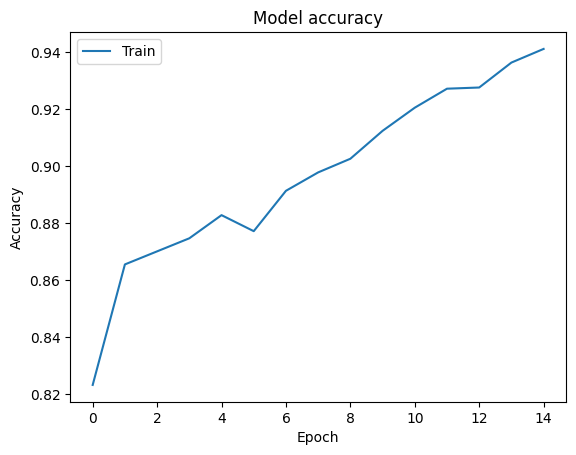

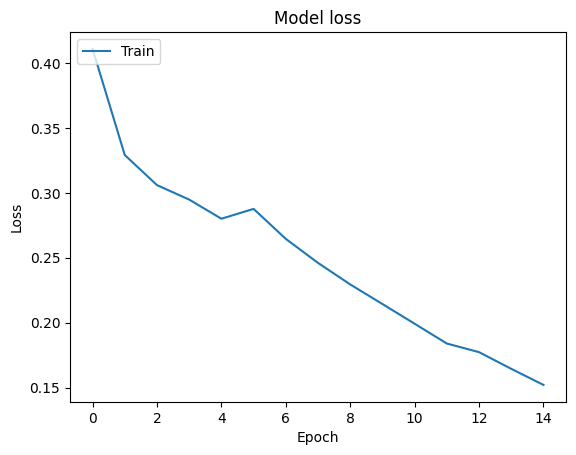

38/38 [==============================] - 1s 7ms/step
Successfully appended to the /content/drive/MyDrive/Interview/Silicon Orchard/REPORT/binary_accuracy_score.json


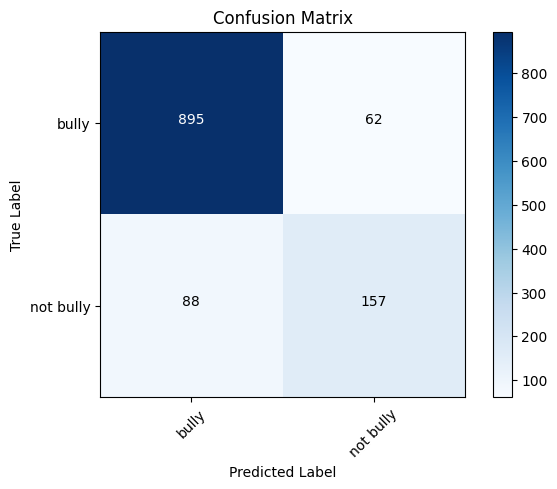

[[895  62]
 [ 88 157]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       957
           1       0.72      0.64      0.68       245

    accuracy                           0.88      1202
   macro avg       0.81      0.79      0.80      1202
weighted avg       0.87      0.88      0.87      1202



In [44]:
bi_data= '/content/drive/MyDrive/Interview/Silicon Orchard/DATA/binary_data.csv'
bi_classifier = BinaryclassClassifier(bi_data)
bi_classifier.train_ml_models(bi_classifier.data)
bi_classifier.train_lstm_model()

In [60]:
datapath = f'/content/drive/MyDrive/Interview/Silicon Orchard/DATA/binary_data.csv'
df = pd.read_csv(datapath)
df.dropna(inplace=True)
df.rename(columns={'new_label':'category'},inplace=True)
df.head()

tokenizer = BertTokenizer.from_pretrained('bert-base-cased')
labels = {'not bully':0,
          'bully':1
          }

class Dataset(torch.utils.data.Dataset):

    def __init__(self, df):

        self.labels = [labels[label] for label in df['category']]
        self.texts = [tokenizer(text,
                               padding='max_length', max_length = 512, truncation=True,
                                return_tensors="pt") for text in df['text']]

    def classes(self):
        return self.labels

    def __len__(self):
        return len(self.labels)

    def get_batch_labels(self, idx):
        # Fetch a batch of labels
        return np.array(self.labels[idx])

    def get_batch_texts(self, idx):
        # Fetch a batch of inputs
        return self.texts[idx]

    def __getitem__(self, idx):

        batch_texts = self.get_batch_texts(idx)
        batch_y = self.get_batch_labels(idx)

        return batch_texts, batch_y

class BertClassifier(nn.Module):

    def __init__(self, dropout=0.5):

        super(BertClassifier, self).__init__()

        self.bert = BertModel.from_pretrained('bert-base-cased')
        self.dropout = nn.Dropout(dropout)
        self.linear = nn.Linear(768, 5)
        self.relu = nn.ReLU()

    def forward(self, input_id, mask):

        _, pooled_output = self.bert(input_ids= input_id, attention_mask=mask,return_dict=False)
        dropout_output = self.dropout(pooled_output)
        linear_output = self.linear(dropout_output)
        final_layer = self.relu(linear_output)

        return final_layer


def train(model, train_data, val_data, learning_rate, epochs):

    train, val = Dataset(train_data), Dataset(val_data)

    train_dataloader = torch.utils.data.DataLoader(train, batch_size=2, shuffle=True)
    val_dataloader = torch.utils.data.DataLoader(val, batch_size=2)

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    criterion = nn.CrossEntropyLoss()
    optimizer = Adam(model.parameters(), lr= learning_rate)

    if use_cuda:

            model = model.cuda()
            criterion = criterion.cuda()

    for epoch_num in range(epochs):

            total_acc_train = 0
            total_loss_train = 0

            for train_input, train_label in tqdm(train_dataloader):

                train_label = train_label.to(device)
                mask = train_input['attention_mask'].to(device)
                input_id = train_input['input_ids'].squeeze(1).to(device)

                output = model(input_id, mask)

                batch_loss = criterion(output, train_label.long())
                total_loss_train += batch_loss.item()

                acc = (output.argmax(dim=1) == train_label).sum().item()
                total_acc_train += acc

                model.zero_grad()
                batch_loss.backward()
                optimizer.step()

            total_acc_val = 0
            total_loss_val = 0

            with torch.no_grad():

                for val_input, val_label in val_dataloader:

                    val_label = val_label.to(device)
                    mask = val_input['attention_mask'].to(device)
                    input_id = val_input['input_ids'].squeeze(1).to(device)

                    output = model(input_id, mask)

                    batch_loss = criterion(output, val_label.long())
                    total_loss_val += batch_loss.item()

                    acc = (output.argmax(dim=1) == val_label).sum().item()
                    total_acc_val += acc

            print(
                f'Epochs: {epoch_num + 1} | Train Loss: {total_loss_train / len(train_data): .3f} | Train Accuracy: {total_acc_train / len(train_data): .3f} | Val Loss: {total_loss_val / len(val_data): .3f} | Val Accuracy: {total_acc_val / len(val_data): .3f}')


def evaluate(model, test_data):

    test = Dataset(test_data)

    test_dataloader = torch.utils.data.DataLoader(test, batch_size=2)

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    if use_cuda:

        model = model.cuda()

    total_acc_test = 0
    with torch.no_grad():

        for test_input, test_label in test_dataloader:

              test_label = test_label.to(device)
              mask = test_input['attention_mask'].to(device)
              input_id = test_input['input_ids'].squeeze(1).to(device)

              output = model(input_id, mask)

              acc = (output.argmax(dim=1) == test_label).sum().item()
              total_acc_test += acc
    bert_json = {'transformerbasedEmbedding': total_acc_test / len(test_data)}
    add_into_existing_json(bert_json,f'{DIR_IMAGES_EDA}binary_accuracy_score.json')
    print(f'Test Accuracy: {total_acc_test / len(test_data): .3f}')

np.random.seed(112)
df_train, df_val, df_test = np.split(df.sample(frac=1, random_state=42),
                                     [int(.8*len(df)), int(.9*len(df))])

print(len(df_train),len(df_val), len(df_test))

EPOCHS = 5
model = BertClassifier()
LR = 1e-6

train(model, df_train, df_val, LR, EPOCHS)

4804 601 601


Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
100%|██████████| 2402/2402 [08:38<00:00,  4.63it/s]


Epochs: 1 | Train Loss:  0.295 | Train Accuracy:  0.801 | Val Loss:  0.235 | Val Accuracy:  0.812


100%|██████████| 2402/2402 [08:37<00:00,  4.64it/s]


Epochs: 2 | Train Loss:  0.212 | Train Accuracy:  0.831 | Val Loss:  0.211 | Val Accuracy:  0.827


100%|██████████| 2402/2402 [08:37<00:00,  4.64it/s]


Epochs: 3 | Train Loss:  0.172 | Train Accuracy:  0.861 | Val Loss:  0.199 | Val Accuracy:  0.827


100%|██████████| 2402/2402 [08:37<00:00,  4.64it/s]


Epochs: 4 | Train Loss:  0.127 | Train Accuracy:  0.907 | Val Loss:  0.202 | Val Accuracy:  0.847


100%|██████████| 2402/2402 [08:37<00:00,  4.65it/s]


Epochs: 5 | Train Loss:  0.084 | Train Accuracy:  0.944 | Val Loss:  0.220 | Val Accuracy:  0.835


Successfully appended to the /content/drive/MyDrive/Interview/Silicon Orchard/REPORT/binary_accuracy_score.json
Test Accuracy:  0.835


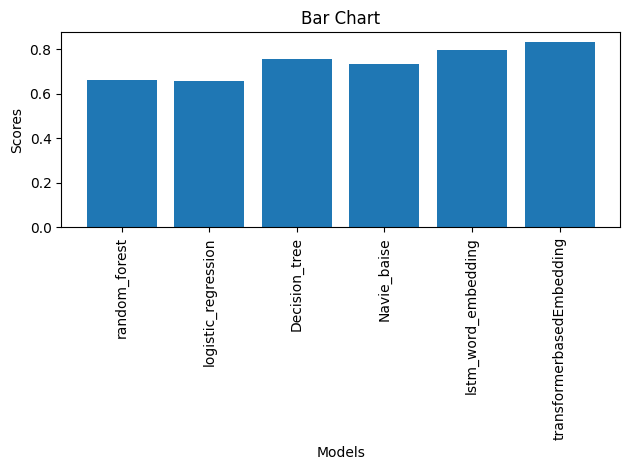

In [61]:
file_name = '/content/drive/MyDrive/Interview/Silicon Orchard/REPORT/binary_accuracy_score.json'
show_comparision_table(file_name)
